In [48]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap

from treeple._lib.sklearn.tree._criterion import Gini
from treeple.tree._oblique_splitter import BestObliqueSplitterTester
from treeple.datasets import make_trunk_classification
import pandas as pd


In [58]:
def plot_proj(max_features=10, 
              feature_combinations=1.5,
              n_features=10,
              n_samples=8,
              save_data=False,
              plot_fig=True):

    criterion = Gini(1, np.array((0, 1)))

    min_samples_leaf = 1
    min_weight_leaf = 0.0
    random_state = np.random.RandomState(1)

    #feature_combinations = 3.0
    monotonic_cst = None
    missing_value_feature_mask = None



    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_features, n_informative=600, seed=0)
    y = y.reshape(-1,1).astype(np.float64)
    X= X.astype(np.float32)

    if save_data:
        data = pd.DataFrame(X)
        data['Target'] = y

        file_name = f"sample_data_nsample_{n_samples}_nfeature_{n_features}.csv"
        data.to_csv(f"saved_data\{file_name}", index=False)
        print(f"Data saved to '{file_name}'")

    sample_weight = np.ones(n_samples)

    #print("The shape of our dataset is: ", X.shape, y.shape, sample_weight.shape)

    # %%
    # Initialize the splitter
    # -----------------------
    # The splitter is initialized in the decision-tree classes, but we expose
    # a testing interface here to demonstrate how the projection matrices are
    # sampled internally.
    #
    # .. warning:: Do not use this interface directly in practice.

    splitter = BestObliqueSplitterTester(
        criterion,
        max_features,
        min_samples_leaf,
        min_weight_leaf,
        random_state,
        monotonic_cst,
        feature_combinations,
    )
    splitter.init_test(X, y, sample_weight, missing_value_feature_mask)

    # %%
    # Generate projection matrix
    # --------------------------
    # Sample the projection matrix that consists of randomly sampled features
    # with an average of ``feature_combinations * max_features`` non-zeros
    # in the ``(max_features, n_features)`` matrix.

    projection_matrix = splitter.sample_projection_matrix_py()
    print("projection matrix shape:", projection_matrix.shape)


    if plot_fig:
        # Visualize the projection matrix
        cmap = ListedColormap(["orange", "white", "green"])

        # Create a heatmap to visualize the indices
        fig, ax = plt.subplots(figsize=(6, 6))

        ax.imshow(projection_matrix, cmap=cmap, aspect=n_features / max_features, interpolation="none")

        ax.set(title="Sampled Projection Matrix", xlabel="Feature Index", ylabel="Projection Vector Index")
        ax.set_xticks(np.arange(n_features))
        ax.set_yticks(np.arange(max_features))
        ax.set_yticklabels(np.arange(max_features, dtype=int) + 1)
        ax.set_xticklabels(np.arange(n_features, dtype=int) + 1)

        # Create a mappable object
        sm = ScalarMappable(cmap=cmap)
        sm.set_array([])  # You can set an empty array or values here

        # Create a color bar with labels for each feature set
        colorbar = fig.colorbar(sm, ax=ax, ticks=[0, 0.5, 1], format="%d")
        colorbar.set_label("Projection Weight")
        colorbar.ax.set_yticklabels(["-1", "0", "1"])

        plt.show()

    print(f"n_feature = ", n_features, 
          "\nn_samples = ", n_samples, 
          "\nmax_features = ", max_features, 
          "\nfeature_combinations = ", feature_combinations)
    print("max_features * feature_combinations = ", max_features * feature_combinations)
    print("Number of non-zeros: ",len(projection_matrix.nonzero()[0]))
    return projection_matrix



c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


Data saved to 'sample_data_nsample_1000_nfeature_100.csv'
projection matrix shape: (200, 100)


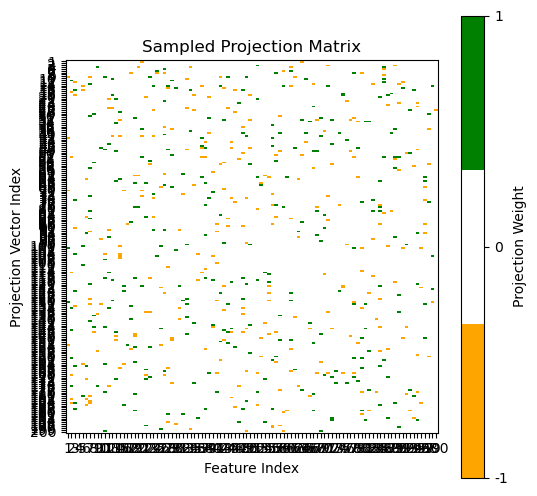

n_feature =  100 
n_samples =  1000 
max_features =  200 
feature_combinations =  3.0
max_features * feature_combinations =  600.0
Number of non-zeros:  600


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
plot_proj(n_features=100, max_features=200, feature_combinations=3.0, n_samples=1000, save_data=True)

c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 10. Setting n_informative to n_dim.
  warnings.warn(


projection matrix shape: (100, 10)


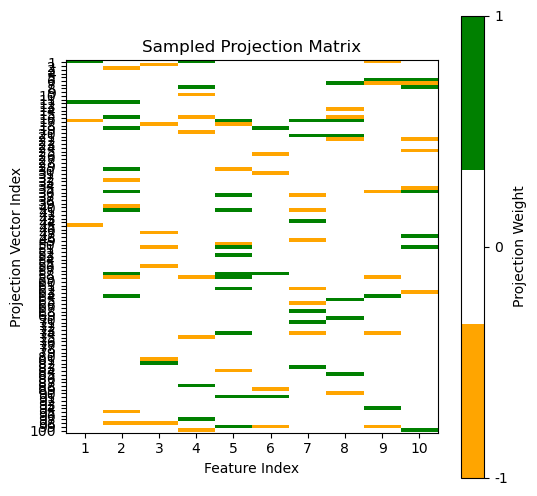

n_feature =  10 
n_samples =  1000 
max_features =  100 
feature_combinations =  1.0
max_features * feature_combinations =  100.0
Number of non-zeros:  100
projection matrix shape: (100, 20)


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 20. Setting n_informative to n_dim.
  warnings.warn(


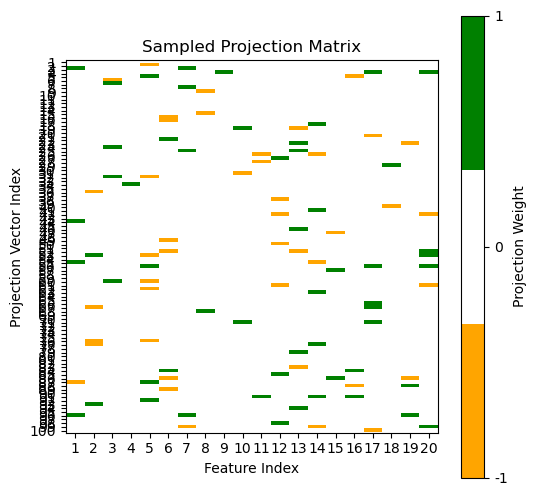

n_feature =  20 
n_samples =  1000 
max_features =  100 
feature_combinations =  1.0
max_features * feature_combinations =  100.0
Number of non-zeros:  100
projection matrix shape: (100, 50)


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 50. Setting n_informative to n_dim.
  warnings.warn(


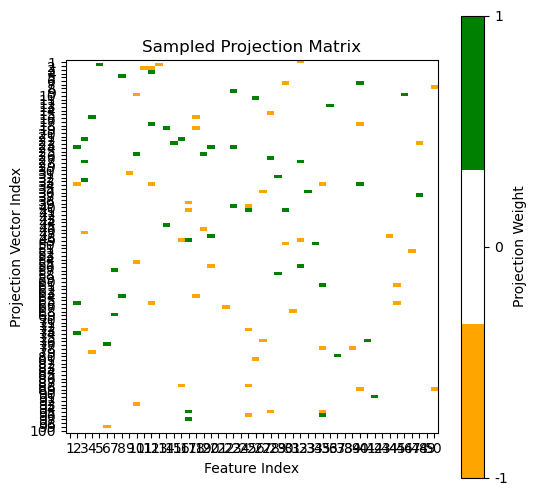

n_feature =  50 
n_samples =  1000 
max_features =  100 
feature_combinations =  1.0
max_features * feature_combinations =  100.0
Number of non-zeros:  100
projection matrix shape: (100, 100)


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


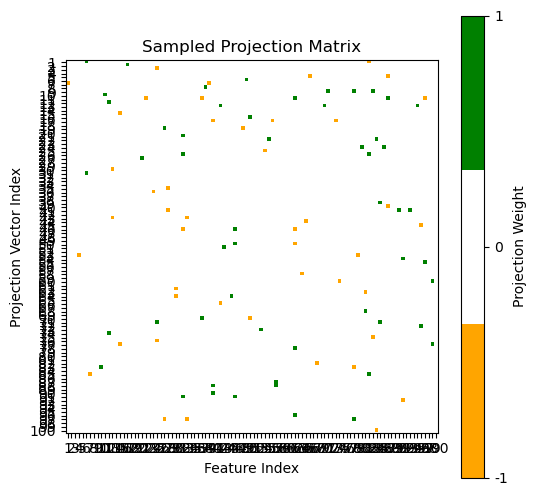

n_feature =  100 
n_samples =  1000 
max_features =  100 
feature_combinations =  1.0
max_features * feature_combinations =  100.0
Number of non-zeros:  100
projection matrix shape: (100, 200)


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


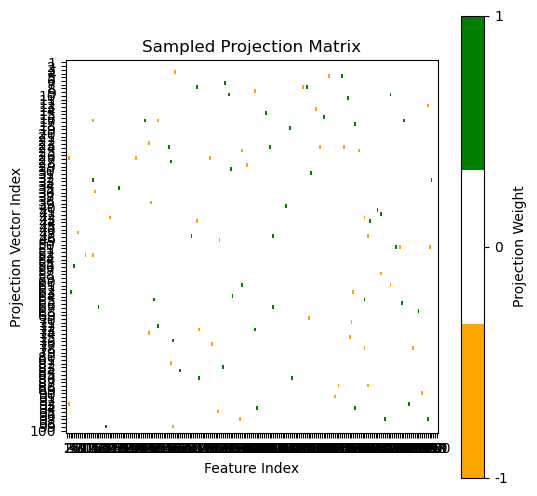

n_feature =  200 
n_samples =  1000 
max_features =  100 
feature_combinations =  1.0
max_features * feature_combinations =  100.0
Number of non-zeros:  100
projection matrix shape: (100, 400)


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 400. Setting n_informative to n_dim.
  warnings.warn(


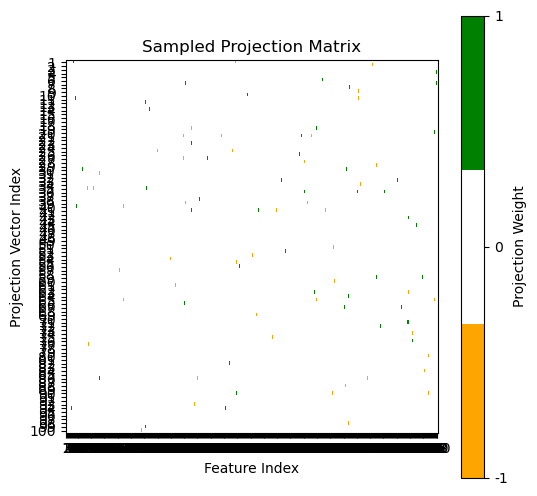

n_feature =  400 
n_samples =  1000 
max_features =  100 
feature_combinations =  1.0
max_features * feature_combinations =  100.0
Number of non-zeros:  100
projection matrix shape: (100, 600)


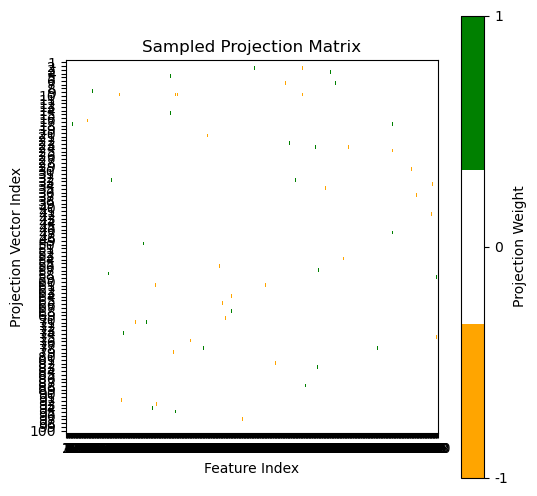

n_feature =  600 
n_samples =  1000 
max_features =  100 
feature_combinations =  1.0
max_features * feature_combinations =  100.0
Number of non-zeros:  100
projection matrix shape: (100, 800)


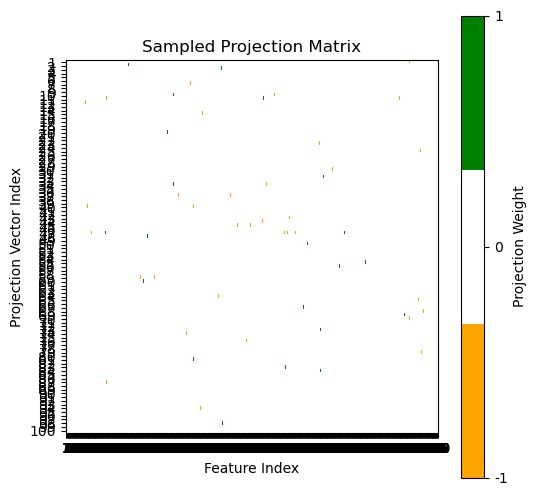

n_feature =  800 
n_samples =  1000 
max_features =  100 
feature_combinations =  1.0
max_features * feature_combinations =  100.0
Number of non-zeros:  100
projection matrix shape: (100, 1000)


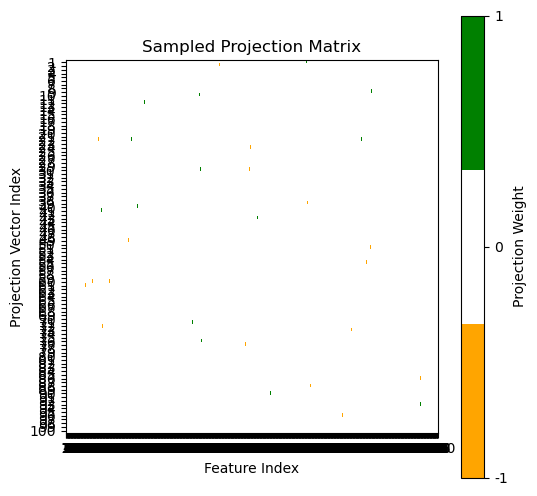

n_feature =  1000 
n_samples =  1000 
max_features =  100 
feature_combinations =  1.0
max_features * feature_combinations =  100.0
Number of non-zeros:  100


In [61]:

n_dims = [10, 20, 50, 100, 200, 400, 600, 800, 1000]
max_features = 100
target_nonzero = 100
for n_dim in n_dims:
    plot_proj(n_features=n_dim, max_features=max_features, feature_combinations=target_nonzero / max_features, n_samples=1000, save_data=False)
#plot_proj(n_features=100, max_features=200, feature_combinations=3.0, n_samples=1000, save_data=True)

In [65]:

# Path to your .data file
file_path = 'data\haberman.data'  # change this to your actual file path

# Read the file assuming it's comma-separated
df = pd.read_csv(file_path, header=None)

# Extract features and labels
X = df.iloc[:, 0:3].values  # features
y = df.iloc[:, 3].values    # class labels

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)
print("First 5 rows of features:\n", X[:5])
print("First 5 class labels:\n", y[:5])


Feature shape: (306, 3)
Labels shape: (306,)
First 5 rows of features:
 [[30 64  1]
 [30 62  3]
 [30 65  0]
 [31 59  2]
 [31 65  4]]
First 5 class labels:
 [1 1 1 1 1]


In [66]:
X.shape

(306, 3)

In [75]:
def plot_proj_existing_data(X, y,
                max_features=10, 
                feature_combinations=1.5,
                plot_fig=True,
                random_state=1):

    criterion = Gini(1, np.array((0, 1)))

    min_samples_leaf = 1
    min_weight_leaf = 0.0
    random_state = np.random.RandomState(random_state)
    n_samples= X.shape[0]
    n_features= X.shape[1]

    #feature_combinations = 3.0
    monotonic_cst = None
    missing_value_feature_mask = None

    # X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_features, n_informative=600, seed=0)
    y = y.reshape(-1,1).astype(np.float64)
    X= X.astype(np.float32)

    # if save_data:
    #     data = pd.DataFrame(X)
    #     data['Target'] = y

    #     file_name = f"sample_data_nsample_{n_samples}_nfeature_{n_features}.csv"
    #     data.to_csv(f"saved_data\{file_name}", index=False)
    #     print(f"Data saved to '{file_name}'")

    sample_weight = np.ones(n_samples)

    #print("The shape of our dataset is: ", X.shape, y.shape, sample_weight.shape)

    # %%
    # Initialize the splitter
    # -----------------------
    # The splitter is initialized in the decision-tree classes, but we expose
    # a testing interface here to demonstrate how the projection matrices are
    # sampled internally.
    #
    # .. warning:: Do not use this interface directly in practice.

    splitter = BestObliqueSplitterTester(
        criterion,
        max_features,
        min_samples_leaf,
        min_weight_leaf,
        random_state,
        monotonic_cst,
        feature_combinations,
    )
    splitter.init_test(X, y, sample_weight, missing_value_feature_mask)

    # %%
    # Generate projection matrix
    # --------------------------
    # Sample the projection matrix that consists of randomly sampled features
    # with an average of ``feature_combinations * max_features`` non-zeros
    # in the ``(max_features, n_features)`` matrix.

    projection_matrix = splitter.sample_projection_matrix_py()
    print("projection matrix shape:", projection_matrix.shape)


    if plot_fig:
        # Visualize the projection matrix
        cmap = ListedColormap(["orange", "white", "green"])

        # Create a heatmap to visualize the indices
        fig, ax = plt.subplots(figsize=(6, 6))

        ax.imshow(projection_matrix, cmap=cmap, aspect=n_features / max_features, interpolation="none")

        ax.set(title="Sampled Projection Matrix", xlabel="Feature Index", ylabel="Projection Vector Index")
        ax.set_xticks(np.arange(n_features))
        ax.set_yticks(np.arange(max_features))
        ax.set_yticklabels(np.arange(max_features, dtype=int) + 1)
        ax.set_xticklabels(np.arange(n_features, dtype=int) + 1)

        # Create a mappable object
        sm = ScalarMappable(cmap=cmap)
        sm.set_array([])  # You can set an empty array or values here

        # Create a color bar with labels for each feature set
        colorbar = fig.colorbar(sm, ax=ax, ticks=[0, 0.5, 1], format="%d")
        colorbar.set_label("Projection Weight")
        colorbar.ax.set_yticklabels(["-1", "0", "1"])

        plt.show()

    print(f"n_feature = ", n_features, 
          "\nn_samples = ", n_samples, 
          "\nmax_features = ", max_features, 
          "\nfeature_combinations = ", feature_combinations)
    print("max_features * feature_combinations = ", max_features * feature_combinations)
    print("Number of non-zeros: ",len(projection_matrix.nonzero()[0]))
    return projection_matrix



projection matrix shape: (10, 3)


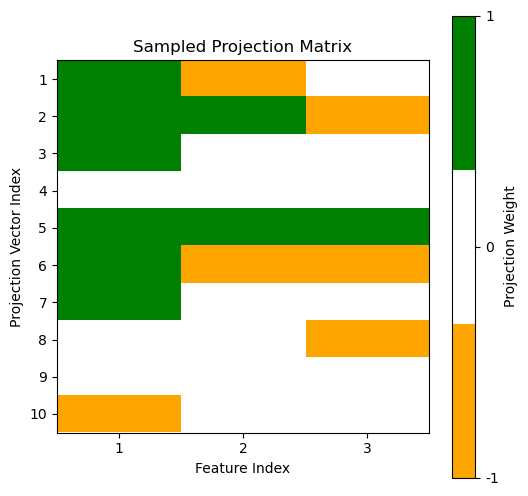

n_feature =  3 
n_samples =  306 
max_features =  10 
feature_combinations =  1.5
max_features * feature_combinations =  15.0
Number of non-zeros:  15
projection matrix shape: (10, 3)


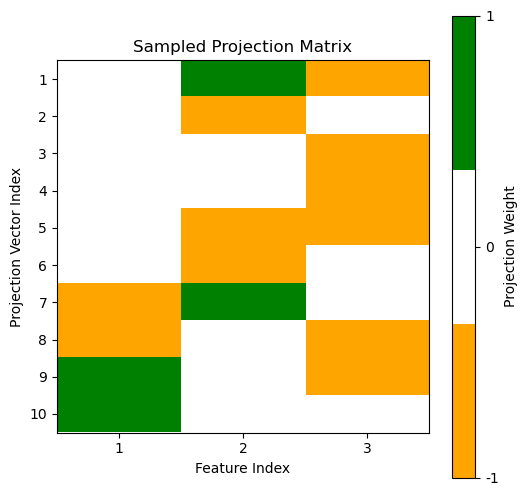

n_feature =  3 
n_samples =  306 
max_features =  10 
feature_combinations =  1.5
max_features * feature_combinations =  15.0
Number of non-zeros:  15
projection matrix shape: (10, 3)


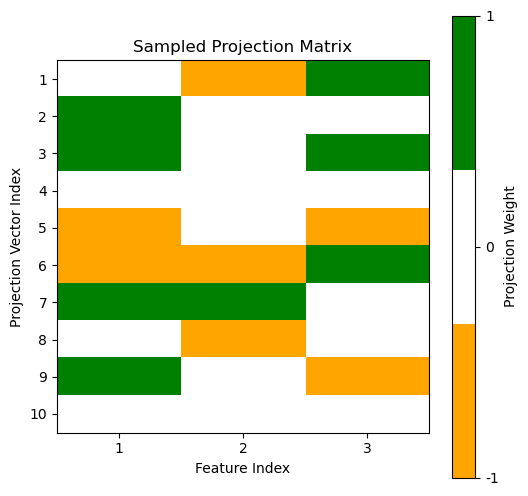

n_feature =  3 
n_samples =  306 
max_features =  10 
feature_combinations =  1.5
max_features * feature_combinations =  15.0
Number of non-zeros:  15
projection matrix shape: (10, 3)


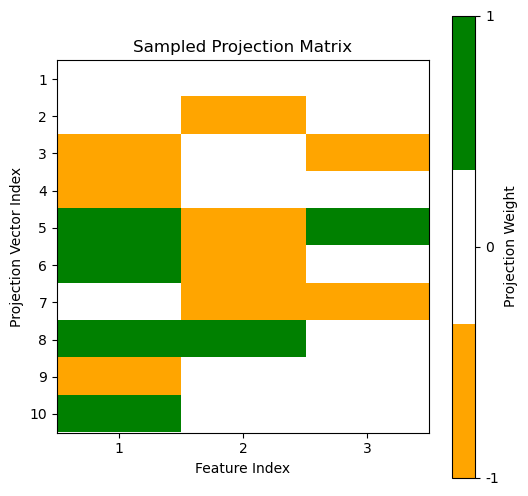

n_feature =  3 
n_samples =  306 
max_features =  10 
feature_combinations =  1.5
max_features * feature_combinations =  15.0
Number of non-zeros:  15
projection matrix shape: (10, 3)


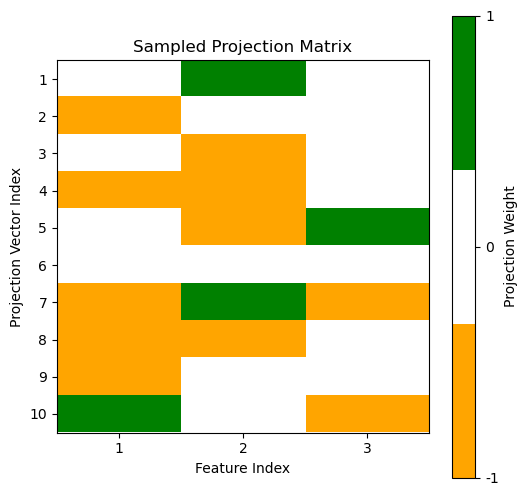

n_feature =  3 
n_samples =  306 
max_features =  10 
feature_combinations =  1.5
max_features * feature_combinations =  15.0
Number of non-zeros:  15


In [77]:
random_states = [1,2,3,4,5]
for random_state in random_states:
    plot_proj_existing_data(X, y, max_features=10, feature_combinations=1.5, plot_fig=True, random_state=random_state)
#plot_proj_existing_data(X, y, max_features=10, feature_combinations=1.0, plot_fig=True)